# 图像梯度 
高斯平滑、双边平滑 和 均值平滑、中值平滑 介绍的平滑处理可以看做是图像的“低通滤波”，它会滤除掉图像的“高频”部分，使图像看起来更平滑，

而图像梯度则可以看做是对图像进行“高通滤波”，它会滤除图像中的低频部分，为的是凸显出图像的突变部分 

## 1 梯度滤波器
OpenCV提供三种类型的梯度滤波器或高通滤波器，Sobel，Scharr和Laplacian。

In [2]:
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8) 
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)  

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 1.1 Sobel 

下面这个例子中先设置dx=1，dy=0计算x方向的梯度，再设置dy=1，dx=0计算y方向的梯度，为了避免出现饱和运算，dtype设置的是比源图像数据类型CV_8U更高的CV_16S，然后将结果用convertScaleAbs()转换回CV_8U(np.unit8)类型，最后用addWeighted()将x和y方向的梯度图加权相加。

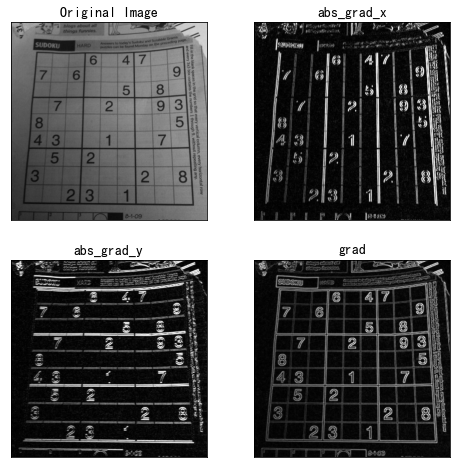

In [2]:
import matplotlib.pyplot as plt 
import cv2

img_src = cv2.imread('./images/sudoku.jpg',0)
grad_x = cv2.Sobel(img_src, cv2.CV_16S, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_src, cv2.CV_16S, 0, 1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

titles = ['Original Image', "abs_grad_x",'abs_grad_y','grad']
images = [img_src, abs_grad_x, abs_grad_y,grad]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()


上图右上角是沿x方向的梯度变化，左下角是沿y方向的梯度变化，右下角为2者各占一半权重组合的图片。

从组合后的梯度图像可以看到：原始图像的棋盘线和数字的边沿部分变得更亮，而棋盘空白和数字中间这些亮度连续区域都变得更暗，最后起到了凸显边沿的效果。

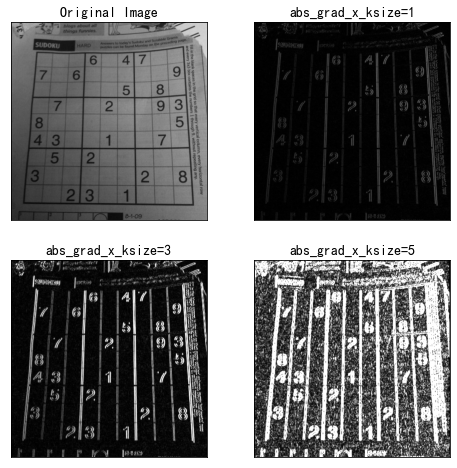

In [4]:
import matplotlib.pyplot as plt 
import cv2

img_src = cv2.imread('./images/sudoku.jpg',0)

grad_x_ksize1 = cv2.Sobel(img_src, cv2.CV_16S, 1, 0, ksize=1)
grad_x_ksize3 = cv2.Sobel(img_src, cv2.CV_16S, 1, 0, ksize=3)
grad_x_ksize5 = cv2.Sobel(img_src, cv2.CV_16S, 1, 0, ksize=5)
#设置不同的ksize值
abs_grad_x_ksize1 = cv2.convertScaleAbs(grad_x_ksize1)
abs_grad_x_ksize3 = cv2.convertScaleAbs(grad_x_ksize3)
abs_grad_x_ksize5 = cv2.convertScaleAbs(grad_x_ksize5)

titles = ['Original Image', "abs_grad_x_ksize=1",'abs_grad_x_ksize=3','abs_grad_x_ksize=5']
images = [img_src, abs_grad_x_ksize1, abs_grad_x_ksize3,abs_grad_x_ksize5]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()


上面的例子中ksize依次设置为1,3,5，从运行结果可以看到**ksize的值越大，梯度信息呈现的越多。** 

下面再设置不同的求导阶数，这里以x方向的dx为例，在ksize=5的时候设置dx分别为1,2,3，这里需要注意dx的值要小于ksize： 

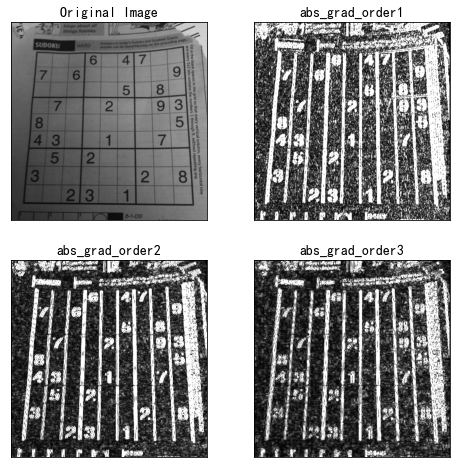

In [5]:
import matplotlib.pyplot as plt 
import cv2

img_src = cv2.imread('./images/sudoku.jpg',0)

#相同的ksize，不同的dx
grad_order1 = cv2.Sobel(img_src, cv2.CV_16S, 1, 0, ksize=5)
grad_order2 = cv2.Sobel(img_src, cv2.CV_16S, 2, 0, ksize=5)
grad_order3 = cv2.Sobel(img_src, cv2.CV_16S, 3, 0, ksize=5)
abs_grad_order1 = cv2.convertScaleAbs(grad_order1)
abs_grad_order2 = cv2.convertScaleAbs(grad_order2)
abs_grad_order3 = cv2.convertScaleAbs(grad_order3)

titles = ['Original Image', "abs_grad_order1",'abs_grad_order2','abs_grad_order3']
images = [img_src, abs_grad_order1, abs_grad_order2,abs_grad_order3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()


从运行结果可以看到在相同的ksize下，dx的值越小，梯度的细节越多。

### 1.2 Scharr  

Scharr变换可以看做是使用了Scharr核的Sobel变换，是一种经过改进的Sobel变换，同样也要区分x和y方向分开计算梯度。

注意Scharr()没有ksize参数，因为Scharr kernel的大小固定为3×3。

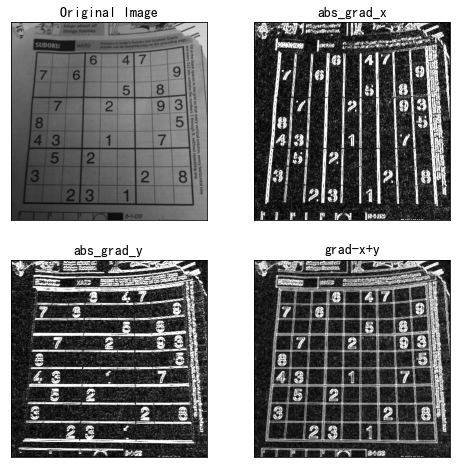

In [7]:
import matplotlib.pyplot as plt 
import cv2

img_src = cv2.imread('./images/sudoku.jpg',0)

grad_x = cv2.Scharr(img_src,cv2.CV_16S,1,0)
grad_y = cv2.Scharr(img_src,cv2.CV_16S,0,1)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

titles = ['Original Image', "abs_grad_x",'abs_grad_y','grad-x+y']
images = [img_src, abs_grad_x, abs_grad_y,grad]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

### 1.3 Laplacian  

Laplacian变换是对图像求二阶导数  

Laplacian()变换不需要区分图像的x和y方向计算梯度，从上图的2种kernel也可以看到其x和y方向是对称的。 

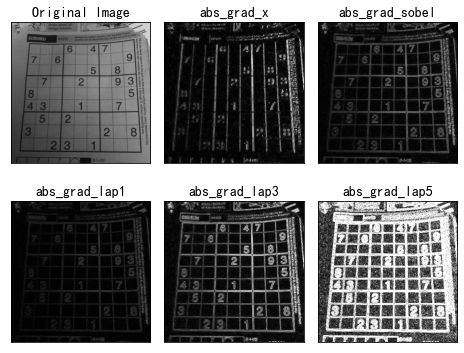

In [13]:
import matplotlib.pyplot as plt 
import cv2

img_src = cv2.imread('./images/sudoku.jpg',0)

#Laplacian
grad_lap = cv2.Laplacian(img_src,cv2.CV_16S,ksize=1)
abs_grad_lap1 = cv2.convertScaleAbs(grad_lap)
grad_lap = cv2.Laplacian(img_src,cv2.CV_16S,ksize=3)
abs_grad_lap3 = cv2.convertScaleAbs(grad_lap)
grad_lap = cv2.Laplacian(img_src,cv2.CV_16S,ksize=5)
abs_grad_lap5 = cv2.convertScaleAbs(grad_lap)
#二阶Sobel
grad_x = cv2.Sobel(img_src, cv2.CV_16S, 2, 0, ksize=3)
grad_y = cv2.Sobel(img_src, cv2.CV_16S, 0, 2, ksize=3)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
abs_grad_sobel = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

titles = ['Original Image',"abs_grad_x", "abs_grad_sobel","abs_grad_lap1",'abs_grad_lap3','abs_grad_lap5']
images = [img_src, abs_grad_x, abs_grad_sobel,abs_grad_lap1,abs_grad_lap3,abs_grad_lap5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.subplots_adjust(wspace =0.1, hspace =-0.3)#调整子图间距
plt.show()

从运行结果可以看到Laplacian()中ksize越大，梯度信息越丰富，这点和Sobel变换是一样的。另外在相同的ksize时，二阶Sobel变换和Laplacian变换对比看，Laplacian变换取得的梯度信息要更明显一些。


## 2 边缘检测 

### 2.1  边缘检测(Canny)  

图像梯度 反映的是图像像素值的变化过程，不管变化大小都考虑在内，所以Sobel，Laplacian变换得到的是一个多级灰度图。

边沿检测也可以看做是图像梯度的一种延伸，不过边沿检测更注意图像的“边沿”部分，图像梯度变化较小的部分会被忽略，只有较大变化的部分保留下来。

canny边沿检测有低错误率、很好地定位边缘点、单一的边缘点响应等优点。canny边沿检测算法由以下几个步骤组成：
- 1）高斯滤波器平滑输入图像；
- 2）计算梯度幅值图像和角度方向；
- 3）对梯度幅值图像应用非最大值抑制；
- 4）用双阈值处理和连接分析检测和连接边沿。





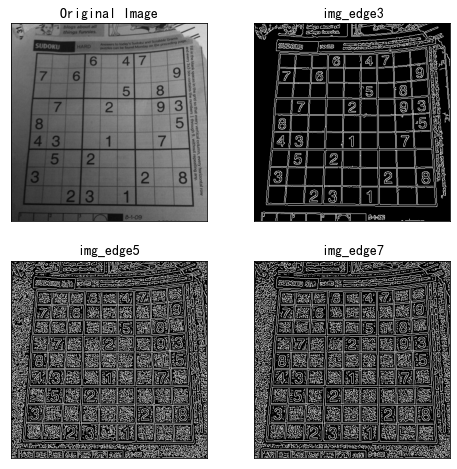

In [15]:
import matplotlib.pyplot as plt 
import cv2

img_src = cv2.imread('./images/sudoku.jpg',0)
img_edge3 = cv2.Canny(img_src,20,100,apertureSize=3)
img_edge5 = cv2.Canny(img_src,20,100,apertureSize=5)
img_edge7 = cv2.Canny(img_src,20,100,apertureSize=7)  

titles = ['Original Image', "img_edge3",'img_edge5','img_edge7']
images = [img_src, img_edge3, img_edge5,img_edge7]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

从这个例子可以看到，相同的threshold值，ksize越大边沿细节越多，这点和Sobel()，Scharr()，Laplacian()计算图像梯度效果是一样的。

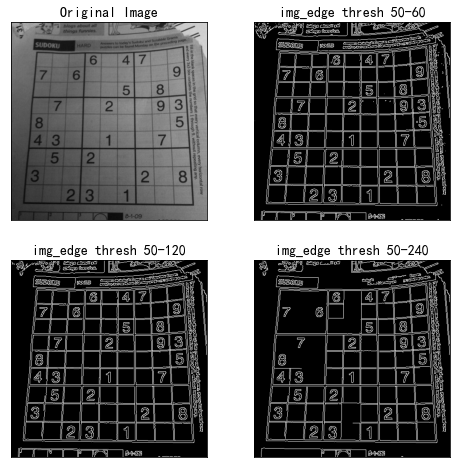

In [16]:
import matplotlib.pyplot as plt 
import cv2

img_src = cv2.imread('./images/sudoku.jpg',0)
img_edge3 = cv2.Canny(img_src,50,60,apertureSize=3)
img_edge5 = cv2.Canny(img_src,50,120,apertureSize=3)
img_edge7 = cv2.Canny(img_src,50,240,apertureSize=3) 

titles = ['Original Image', "img_edge thresh 50-60",'img_edge thresh 50-120','img_edge thresh 50-240']
images = [img_src, img_edge3, img_edge5,img_edge7]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

可以看到**相同的ksize时，threshold1和threshold2的差值越小，边沿细节越多。**  

将canny()变换后的边沿图像用直方图显示，可以看到变换后的图像是一个二值图像，像素的取值为0或者255。 

(array([153936.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  23301.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

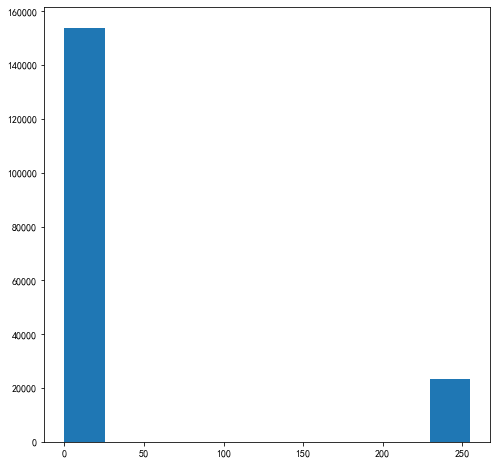

In [20]:
plt.hist(img_edge3.ravel( ))